<a href="https://colab.research.google.com/github/mahmoudhaney/TrafficSignRecognition/blob/main/TrafficSignModel/TrafficSign_SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1. Link Kaggle Dataset**

In [1]:
! pip install -q kaggle
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"mahmoudhaney","key":"4c999f7234ba33c32b0d8b0e1cc2e6ef"}'}

In [2]:
! mkdir ~/.kaggle

In [3]:
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

In [4]:
# Download dataset
! kaggle datasets download meowmeowmeowmeowmeow/gtsrb-german-traffic-sign

 99% 608M/612M [00:03<00:00, 191MB/s]
100% 612M/612M [00:03<00:00, 181MB/s]


In [ ]:
# Unzip dataset
! unzip gtsrb-german-traffic-sign.zip

# **2. Import Dependencies**

In [6]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
from PIL import Image
import os
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras.models import Sequential, load_model
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout
from sklearn.metrics import plot_confusion_matrix
import seaborn as sns

# **3. Preparing & Preprocessing Images**

In [7]:
dataset_dir = './'

folderMap = {
    0: '20 km/h', 1: '30 km/h', 2: '50 km/h', 3: '60 km/h', 4: '70 km/h', 5: '80 km/h', 6:'80 km/h end', 7: '100 km/h', 8: '120 km/h', 
    9: 'No overtaking', 10: 'No overtaking for tracks', 11: 'Crossroad with secondary way', 12: 'Main road', 13: 'Give way', 14: 'Stop', 
    15: 'Road up', 16: 'Road up for track', 17: 'Brock', 18: 'Other dangerous', 19: 'Turn left', 20: 'Turn right', 21: 'Winding road', 
    22: 'Hollow road', 23: 'Slippery road', 24: 'Narrowing road', 25: 'Roadwork', 26: 'Traffic light', 27: 'Pedestrian', 28: 'Children', 
    29: 'Bike', 30: 'Snow', 31: 'Deer', 32: 'End of the limits', 33: 'Only right', 34: 'Only left', 35: 'Only straight', 36: 'Only straight and right', 
    37: 'Only straight and left', 38: 'Take right', 39: 'Take left', 40: 'Circle crossroad', 41: 'End of overtaking limit', 42: 'End of overtaking limit for track'
}

In [8]:
Meta = os.path.join(dataset_dir, 'Meta')
Train = os.path.join(dataset_dir, 'Train')

In [9]:
num_classes = len(os.listdir(Train))
num_classes

43

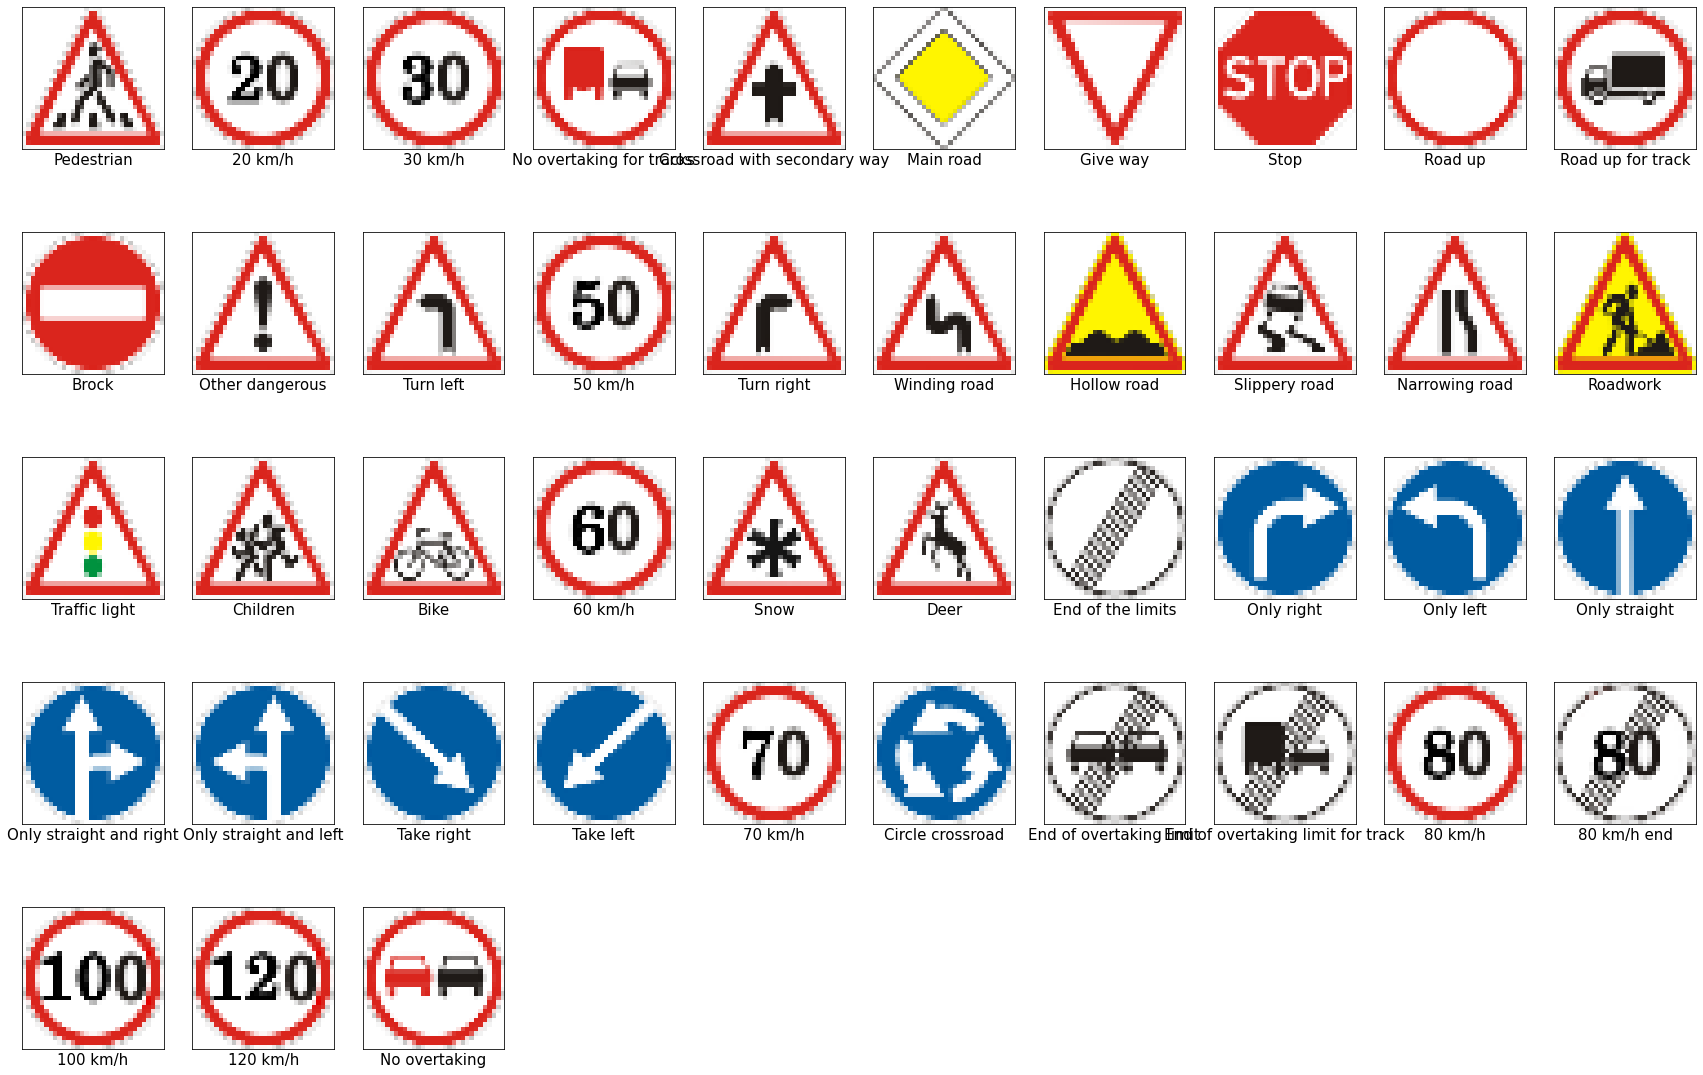

In [10]:
df = pd.read_csv(os.path.join(dataset_dir, 'Meta.csv'))
df = df.sort_values(by=['ClassId'])

meta_images = []
meta_labels = []

for i in range(df.shape[0]):
    label = df.ClassId[i]
    image_path_meta = df.Path[i]
    image_path = os.path.join(dataset_dir, image_path_meta)
    image = plt.imread(image_path)
    image = cv2.resize(image, (32, 32))
    meta_images.append(image)
    meta_labels.append(folderMap[int(label)])

fig = plt.figure(figsize=(30, 20))
for i in range(len(meta_images)):
    ax = fig.add_subplot(5, 10, i+1)
    plt.axis()
    plt.xticks([])
    plt.yticks([])
    ax.set_xlabel(xlabel = meta_labels[i], fontsize=15)
    ax.imshow(meta_images[i])

In [11]:
images = []
labels = []
labels_idx = []

for label in os.listdir(Train):
    images_for_label = os.path.join(Train, label)
    for image in os.listdir(images_for_label):
        image = plt.imread(os.path.join(images_for_label, image))
        image = cv2.resize(image, (32, 32))
        images.append(image)
        labels.append(folderMap[int(label)])
        labels_idx.append(label)

In [12]:
images = np.array(images)
labels = np.array(labels)
labels_idx = np.array(labels_idx, dtype='int32')

images.shape

(39209, 32, 32, 3)

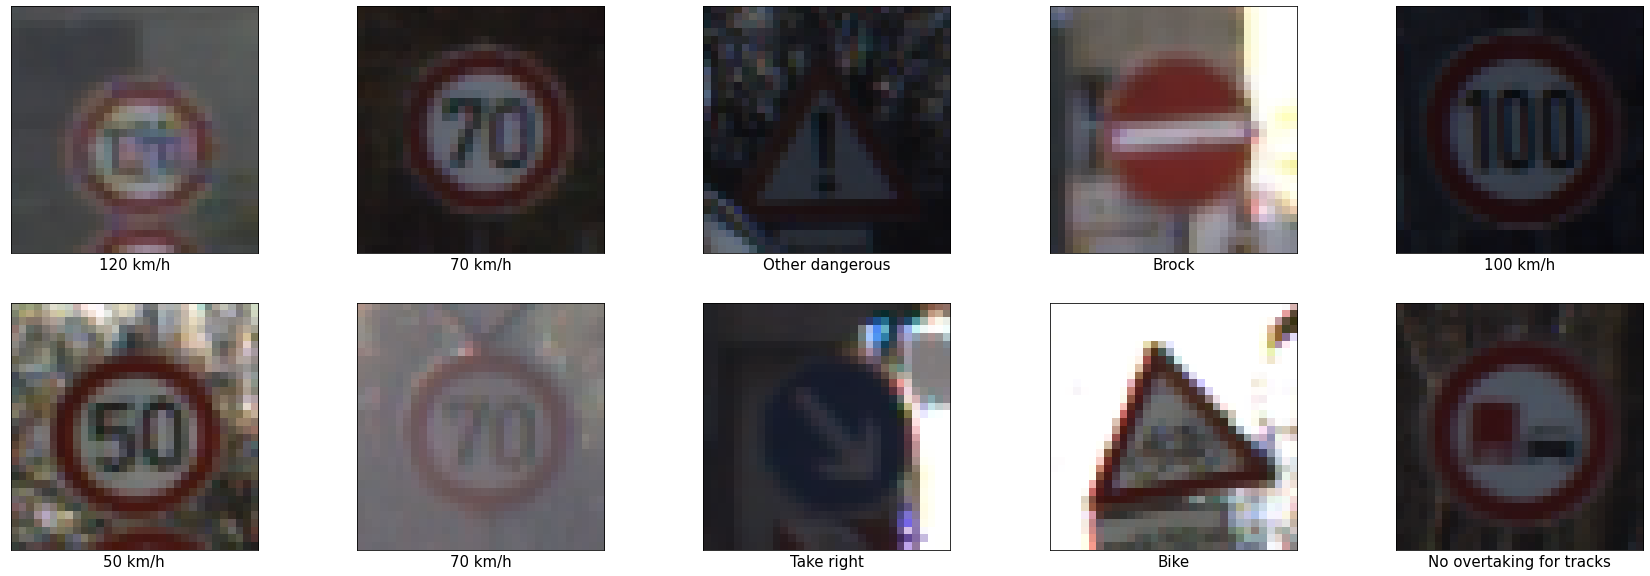

In [13]:
fig = plt.figure(figsize=(30, 10))
for i in range(10):
    random_num = np.random.randint(0, 39209)
    ax = fig.add_subplot(2, 5, i+1)
    plt.axis()
    plt.xticks([])
    plt.yticks([])
    ax.set_xlabel(xlabel = labels[random_num], fontsize=15)
    ax.imshow(images[random_num])

# **4. Splitting Sataset**

In [17]:
X_train_svm, X_test_svm, y_train_svm, y_test_svm = train_test_split(images, labels_idx, random_state=1, stratify=labels_idx, shuffle=True,test_size=0.2)

In [19]:
print("Training: ", len(X_train_svm))
print("Testing : ", len(X_test_svm))

Training:  31367
Testing :  7842


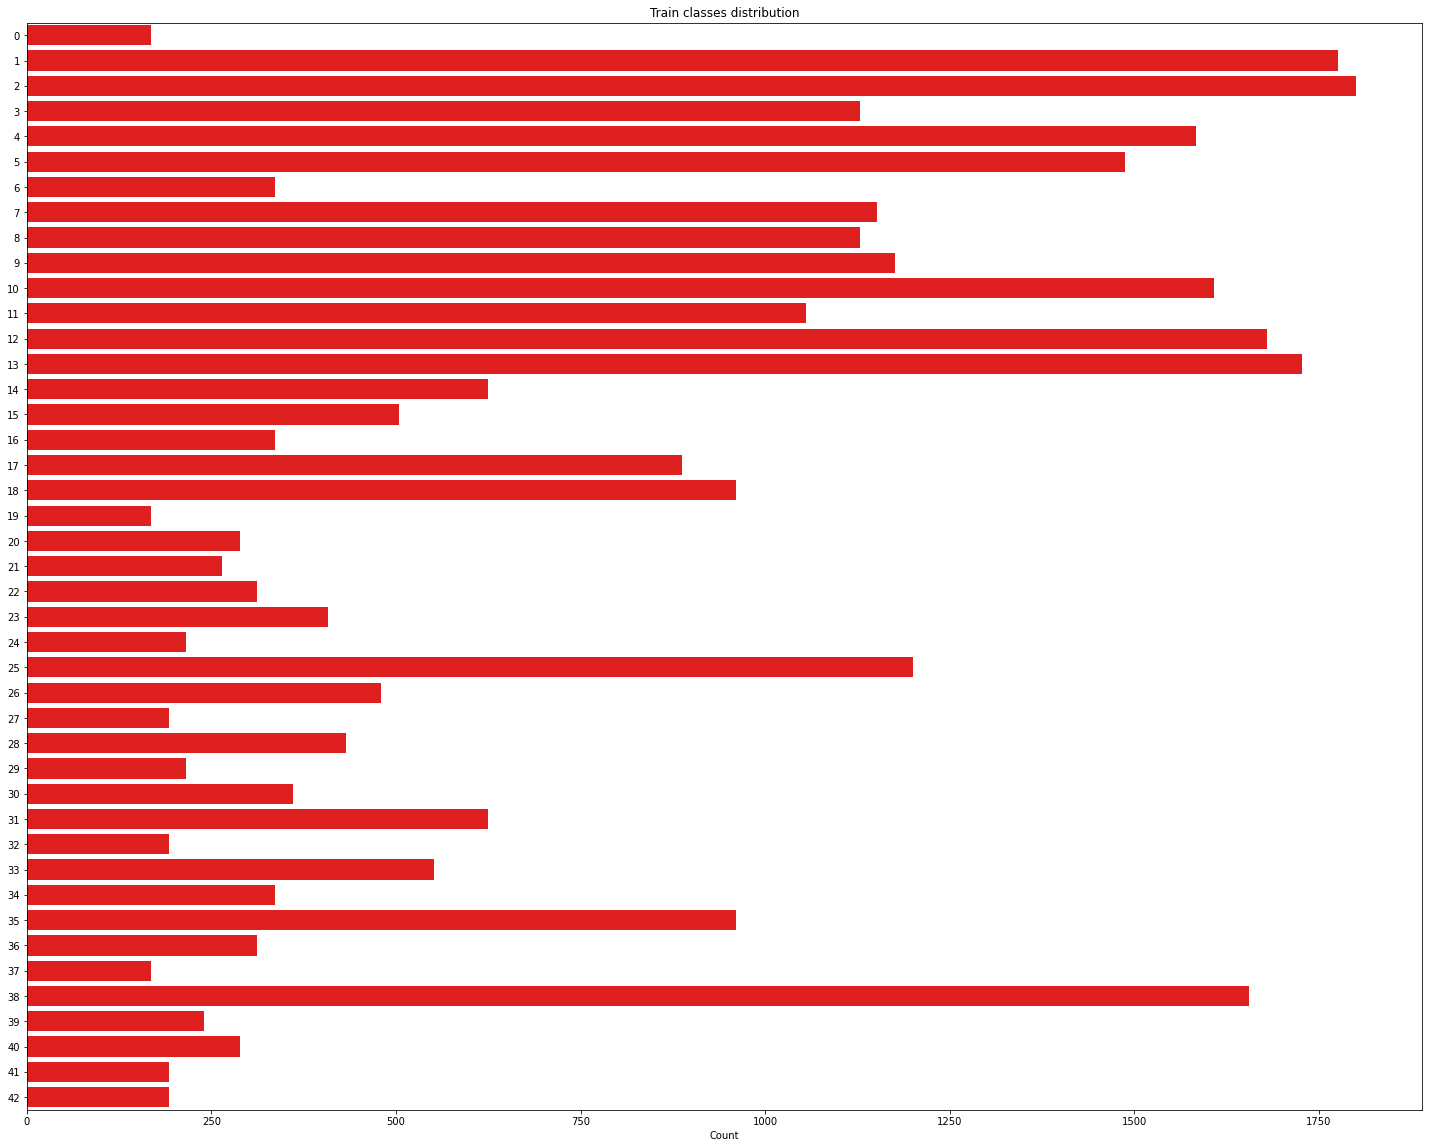

In [20]:

plt.figure(figsize=(25, 20))
plt.title('Train classes distribution')
sns.countplot(y=y_train_svm, color="red")
plt.xlabel('Count')
plt.show()

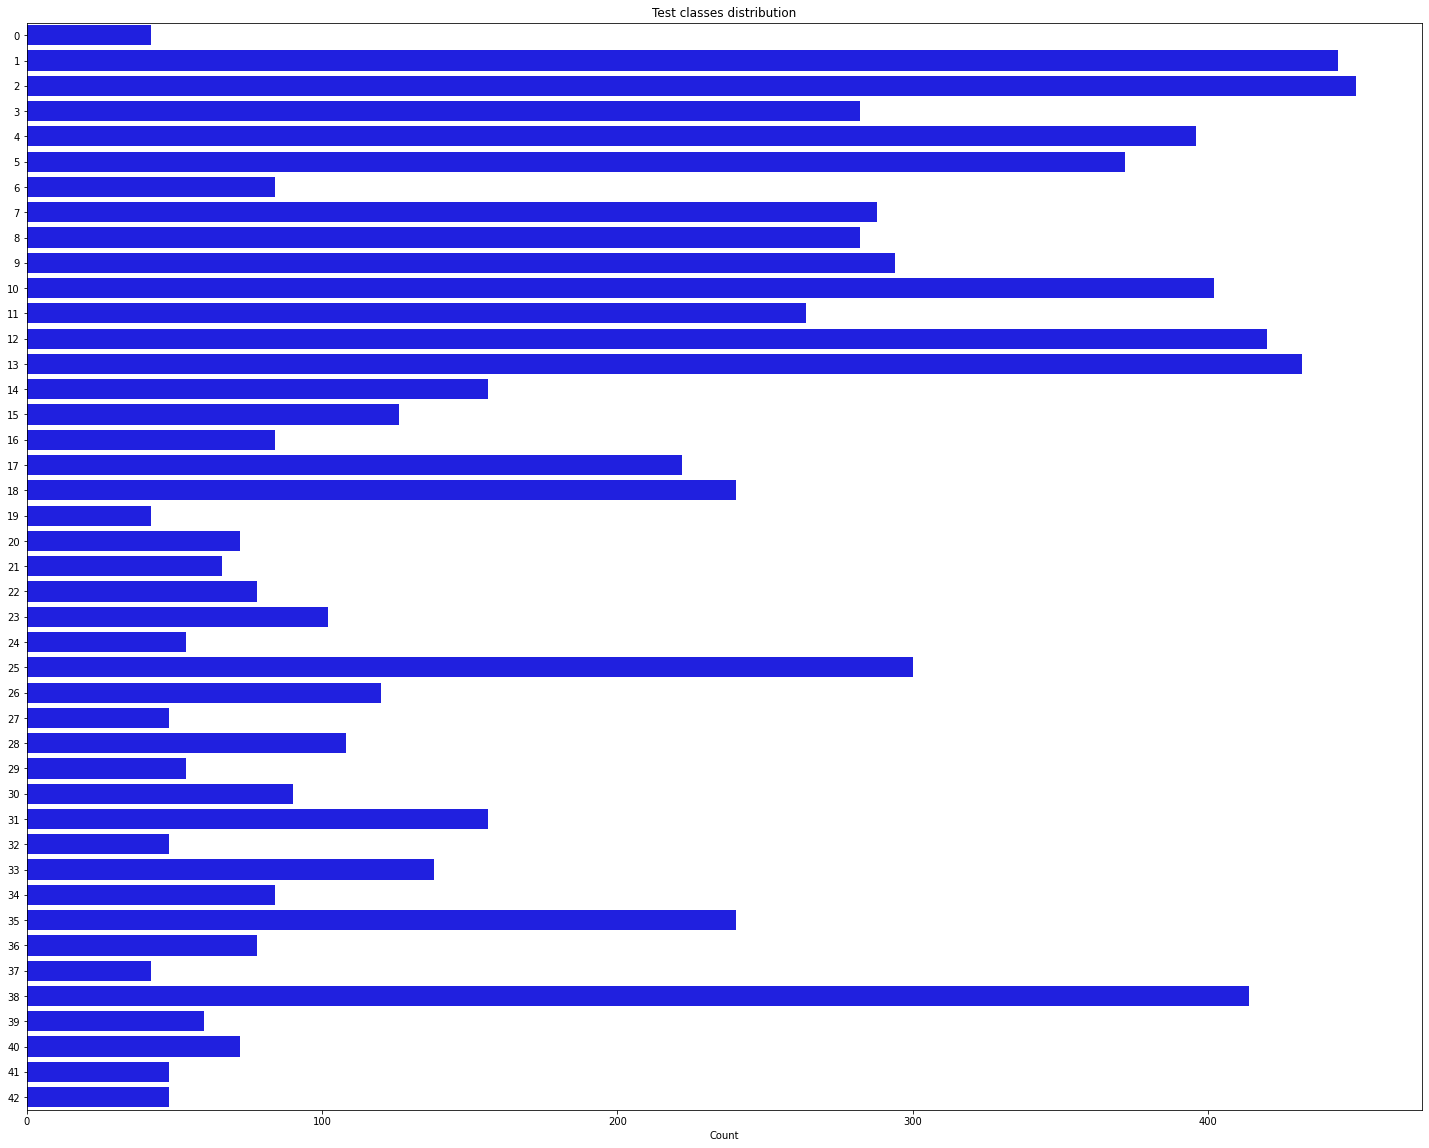

In [21]:
plt.figure(figsize=(25, 20))
plt.title('Test classes distribution')

sns.countplot(y=y_test_svm, color="blue")
plt.xlabel('Count')
plt.show()

In [22]:
nsamples=39209
nx=32
ny=32
f=3
nsamples, nx, ny,f = X_train_svm.shape
dx_train_dataset = X_train_svm.reshape((nsamples,nx*ny,f))
dx_train_dataset = X_train_svm.reshape((nsamples,nx*ny*f))

# **5. Training & Evaluation**

In [23]:
from sklearn.svm import SVC
import pickle

In [24]:
#SVM
medol=SVC(kernel='linear')
medol.fit(dx_train_dataset, y_train_svm)
pick = open('medol.sav','wb')
pickle.dump(medol, pick)
pick = open('medol.sav','rb')
medol =pickle.load(pick)
pick.close()

In [25]:
accuracy=medol.score(dx_train_dataset,y_train_svm)
print("Accuracy", accuracy)

Accuracy 0.9996493129722319
